In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_arrays as ua
from utils import u_statistics as u_stats
import datetime
import matplotlib.colors as mcolors
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from utils import u_plot as uplot
import salem
import numpy.ma as ma
from scipy import stats, ndimage
import warnings
from scipy.ndimage.measurements import label
import shapely.geometry as shpg
import datetime
from scipy.stats import gaussian_kde, linregress

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [45]:
fpath = '/home/ck/DIR/mymachine/ERA5/RioSanta_totEvap_monthly.nc'

In [46]:
corr_all = xr.open_dataset(fpath)
corr_all = uda.flip_lat(corr_all)

In [47]:

fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)
corr_all = corr_all.salem.roi(shape=sdf)

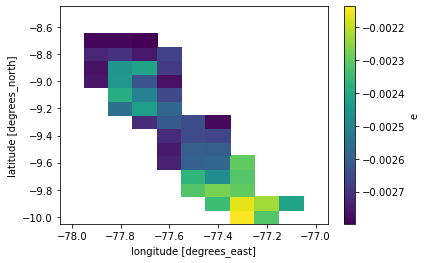

In [48]:
corr_all['e'].mean('time').plot()

In [34]:
corr_all.mean()*-1000

<xarray.Dataset>
Dimensions:  ()
Data variables:
    e        float64 2.55

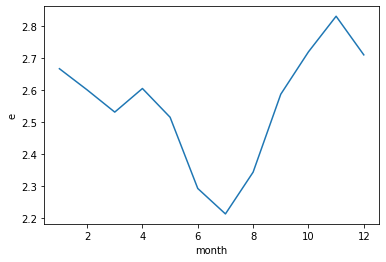

In [57]:
f = plt.figure()
ax = f.add_subplot(111)
(corr_all['e'].mean(['latitude', 'longitude']).groupby('time.month').mean()*-1000).plot()
f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/ET_ERA5_RioSanta.jpg')

In [51]:
huaraz = corr_all['e'].sel(longitude=-77.5, latitude=-9.5, method='nearest')

In [52]:
huaraz

<xarray.DataArray 'e' (time: 487)>
array([-0.00273933, -0.00249119, -0.00248109, -0.00260117, -0.00244224,
       -0.00236656, -0.00229756, -0.00240064, -0.00263362, -0.00266736,
       -0.00254003, -0.00268246, -0.00268314, -0.00256159, -0.00253655,
       -0.00264737, -0.00253403, -0.00227713, -0.00234405, -0.00255985,
       -0.00260605, -0.00253807, -0.0026714 , -0.00277436, -0.00275331,
       -0.00297956, -0.00261049, -0.00242528, -0.00248681, -0.00227482,
       -0.00239586, -0.0025251 , -0.00265916, -0.00271435, -0.00288872,
       -0.00263356, -0.00260707, -0.00238323, -0.00236981, -0.00242281,
       -0.00233984, -0.00217607, -0.00222862, -0.00248631, -0.00263059,
       -0.00277762, -0.00251168, -0.00273619, -0.00253161, -0.00248294,
       -0.00257231, -0.00244151, -0.00231283, -0.00226034, -0.00226348,
       -0.00243365, -0.00262548, -0.00297563, -0.00297181, -0.00275393,
       -0.00248445, -0.00231395, -0.00227381, -0.00241647, -0.00251123,
       -0.00233321, -0.00228089, -0.00241821, -0.00282798, -0.00305389,
       -0.00295632, -0.00268044, -0.00245829, -0.00266343, -0.00280513,
       -0.0025996 , -0.00253593, -0.00231654, -0.00229784, -0.00261627,
       -0.00262997, -0.00292291, -0.00263283, -0.00270239, -0.00252257,
       -0.00252976, -0.00259067, -0.00233349, -0.00245925, -0.0023345 ,
       -0.00215895, -0.00229402, -0.00260033, -0.00274422, -0.00266046,
       -0.00254138, -0.0024273 , -0.00244207, -0.00217882, -0.00245717,
...
       -0.00232889, -0.002516  , -0.00298523, -0.00275331, -0.0029804 ,
       -0.00279559, -0.00268286, -0.00245386, -0.00245077, -0.00274641,
       -0.00245262, -0.00235297, -0.00238278, -0.00253633, -0.00274416,
       -0.00296996, -0.00290568, -0.00268224, -0.00288406, -0.00260914,
       -0.00251359, -0.00258972, -0.00244319, -0.00244072, -0.00237425,
       -0.00255115, -0.002851  , -0.00301066, -0.00295851, -0.00299955,
       -0.00313619, -0.0026691 , -0.00275303, -0.00276033, -0.00272631,
       -0.00234506, -0.00230452, -0.00248148, -0.00280171, -0.00283657,
       -0.00333066, -0.00275876, -0.0024922 , -0.00248923, -0.00245122,
       -0.00259994, -0.00245156, -0.00235112, -0.00225675, -0.0021896 ,
       -0.00272883, -0.00301695, -0.00281524, -0.00276274, -0.00267752,
       -0.0028126 , -0.00253139, -0.00254879, -0.00257574, -0.00233169,
       -0.0021969 , -0.00256945, -0.00287413, -0.00264603, -0.00286537,
       -0.00301178, -0.00270217, -0.00253846, -0.00247614, -0.0026394 ,
       -0.00257529, -0.00238767, -0.0023372 , -0.00217029, -0.00264625,
       -0.00287154, -0.00278627, -0.00262711, -0.00295098, -0.00282495,
       -0.00260027, -0.0027468 , -0.00251017, -0.00242231, -0.00224827,
       -0.00221492, -0.00267949, -0.00293453, -0.00299202, -0.00258775,
       -0.00245054, -0.00293869, -0.00252572, -0.00266017, -0.00248002,
       -0.00223508, -0.00240316], dtype=float32)
Coordinates:
    longitude  float32 -77.5
    latitude   float32 -9.5
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-07-01
Attributes:
    units:          m of water equivalent
    long_name:      Evaporation
    standard_name:  lwe_thickness_of_water_evaporation_amount
    pyproj_srs:     +proj=longlat +datum=WGS84 +no_defs

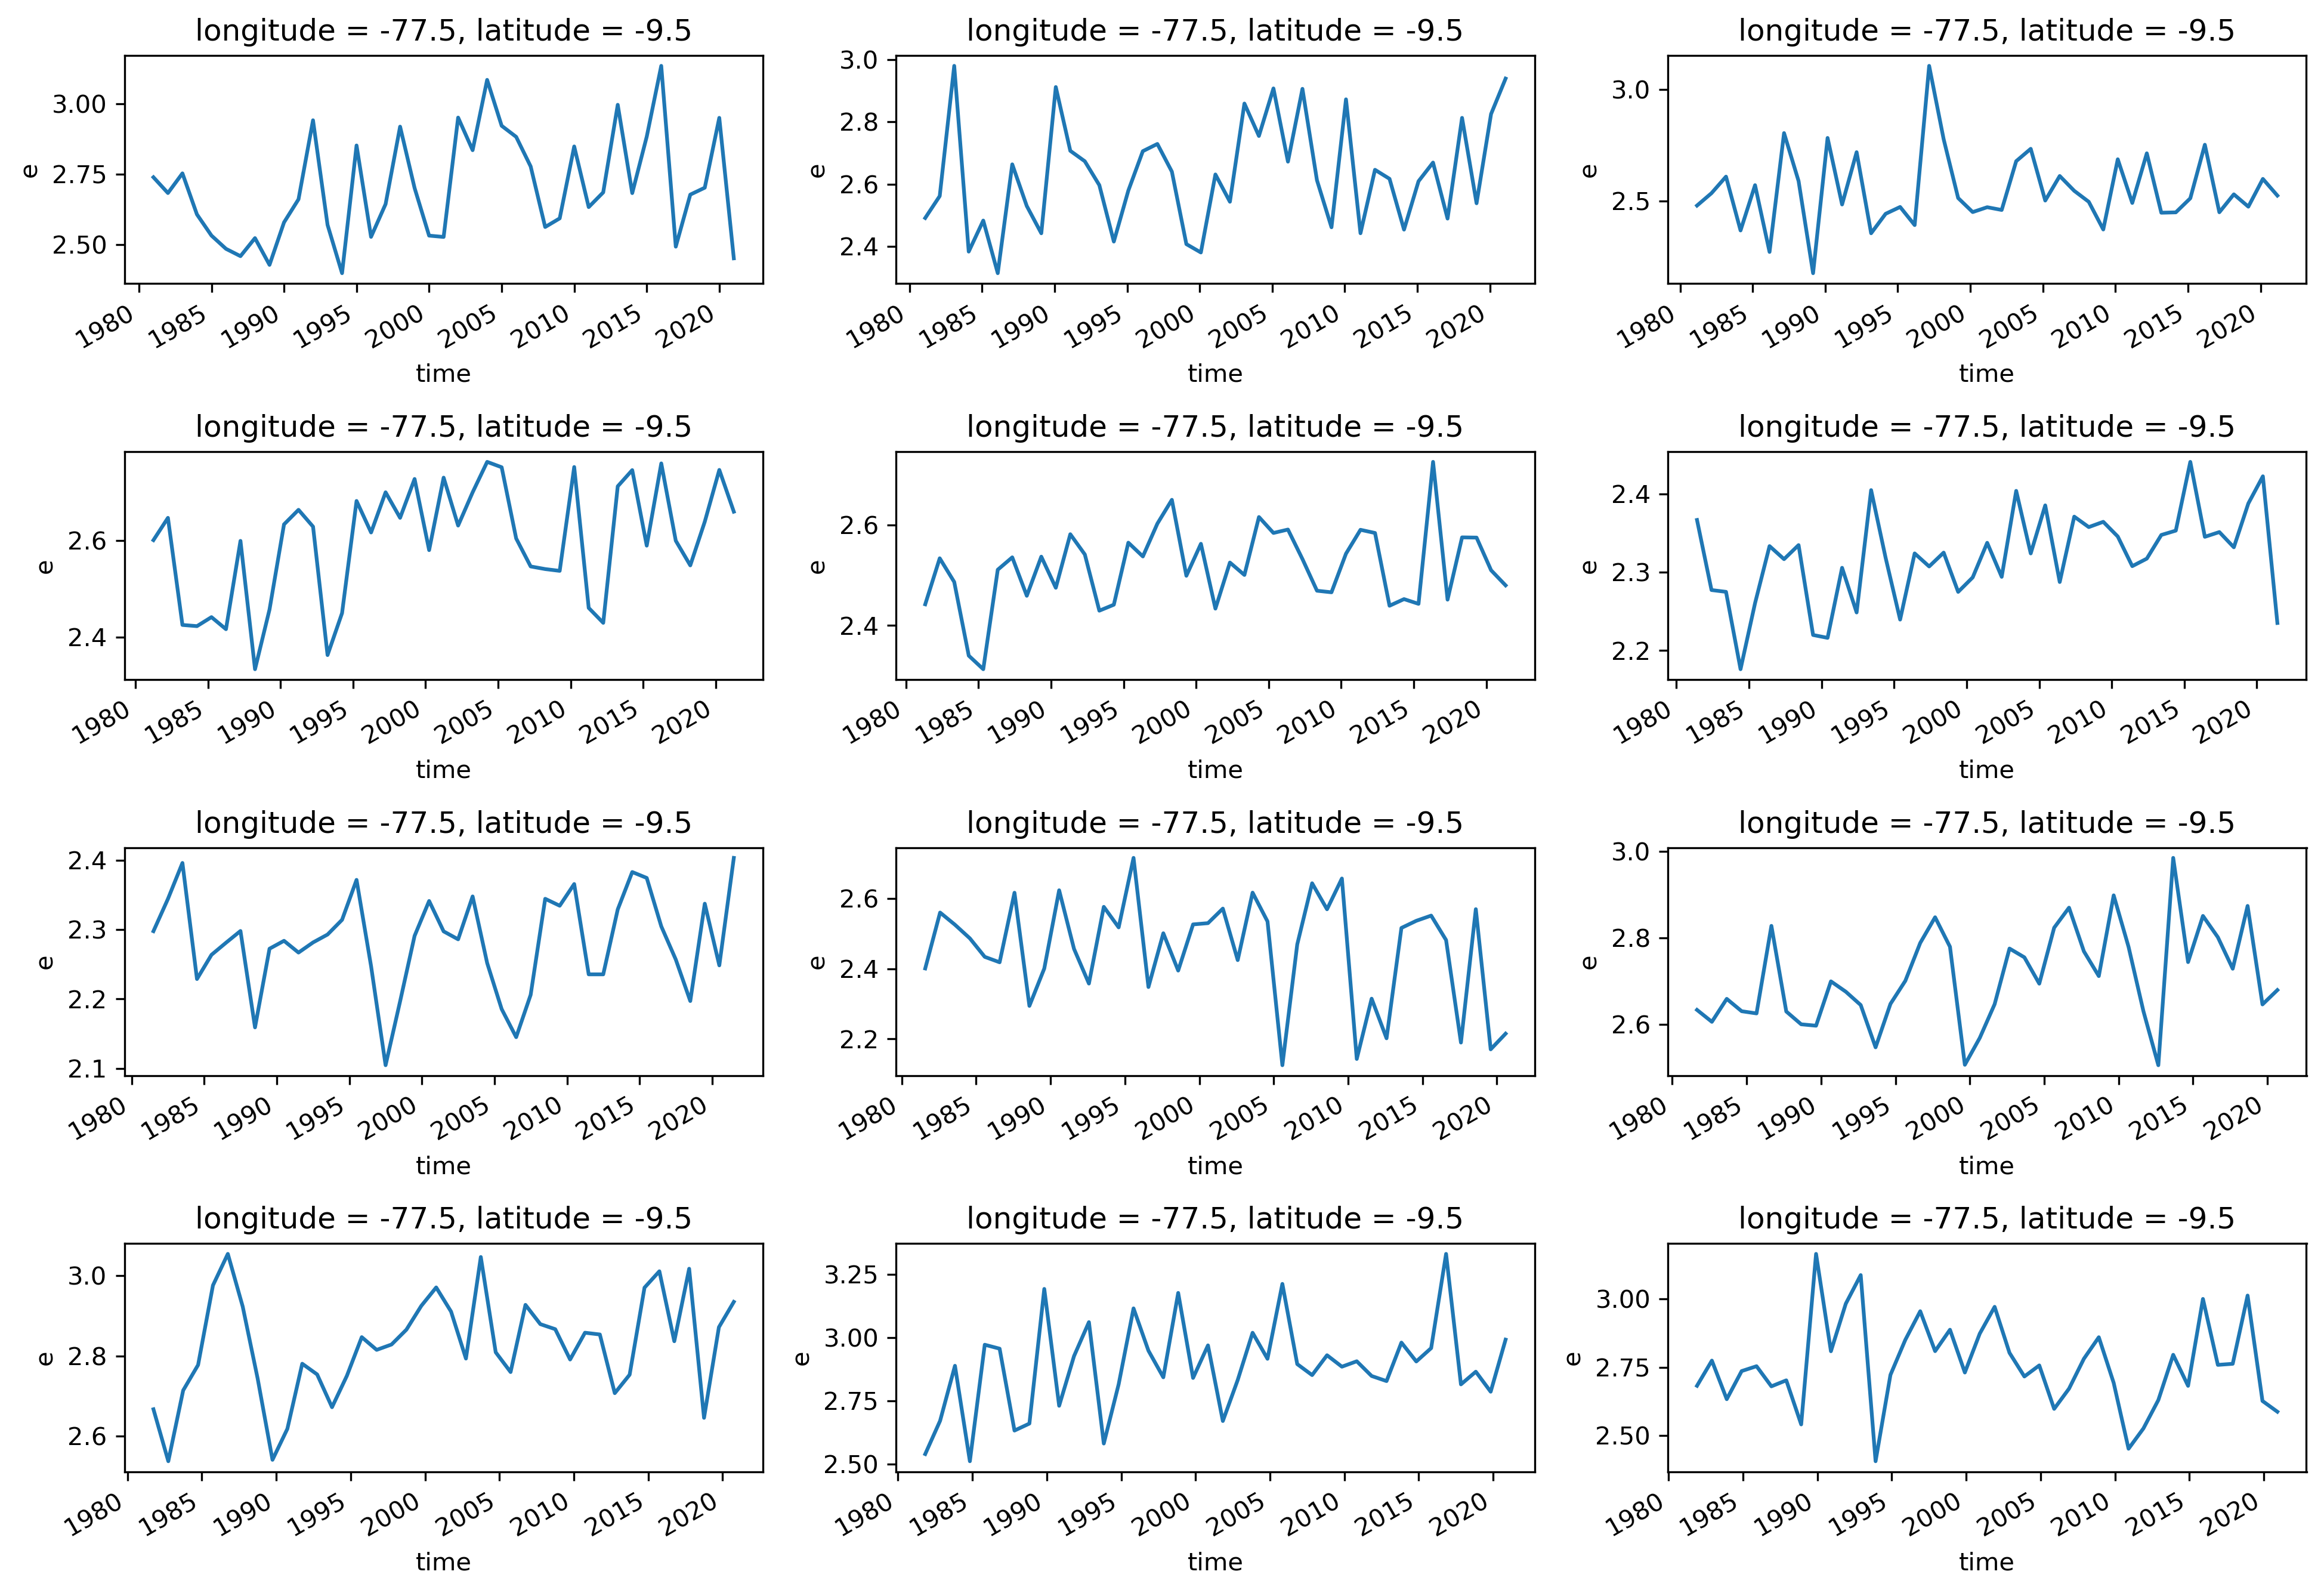

In [53]:
f = plt.figure(figsize=(13,9), dpi=300)
for m in range(1,13):
    ax = f.add_subplot(4,3,m)
    (huaraz.sel(time=(huaraz['time.month']==m))*-1000).plot()
plt.tight_layout()

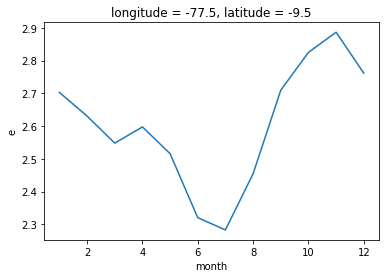

In [55]:
(huaraz.groupby('time.month').mean()*-1000).plot()

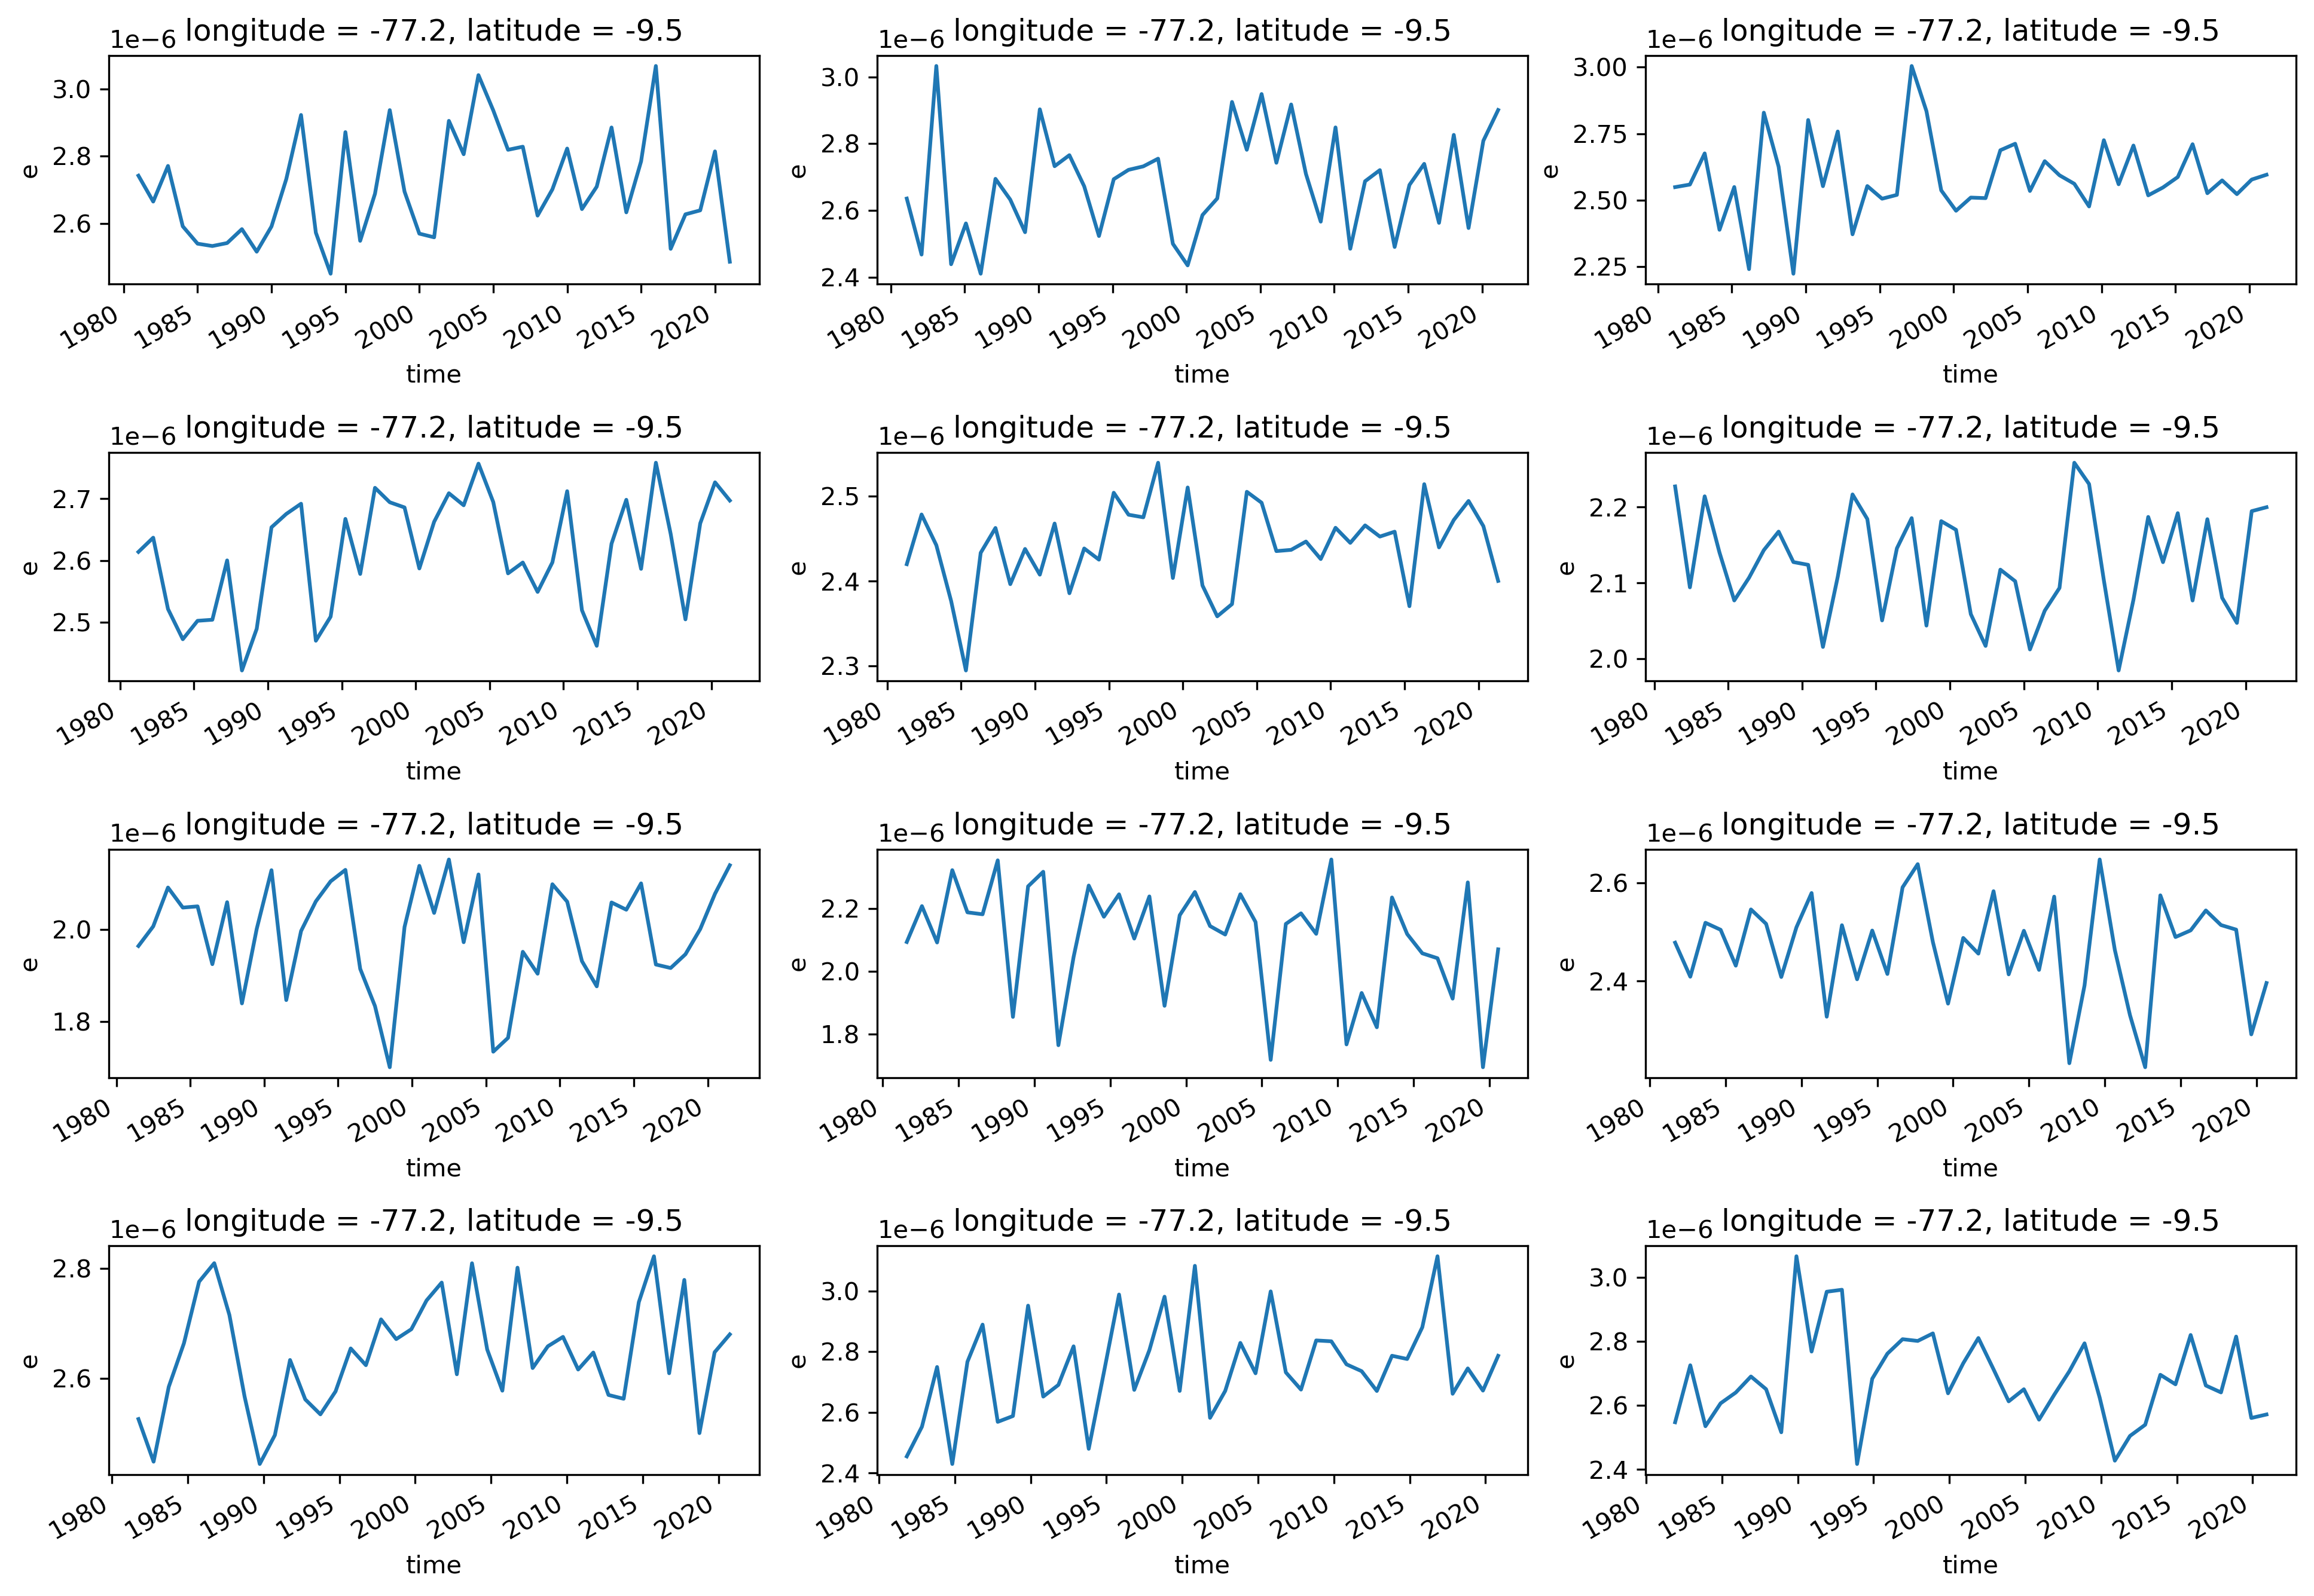

In [20]:
f = plt.figure(figsize=(13,9), dpi=300)
for m in range(1,13):
    ax = f.add_subplot(4,3,m)
    (huaraz['e'].sel(time=(huaraz['time.month']==m))/-1000).plot()
plt.tight_layout()

In [10]:
huaraz.plot.line(x='time')

AttributeError: '_Dataset_PlotMethods' object has no attribute 'line'

In [5]:
def readERA(var):

    u200orig = xr.open_dataset('/media/ck/Elements/SouthAmerica/ERA5/hourly/'+var+'_15UTC_1981-2019_peru_big.nc')
    u200orig = uda.flip_lat(u200orig)
    datetimes = pd.to_datetime(u200orig.time.values)
    newtimes = []
    for t in datetimes:
        newtimes.append(t.replace(hour=0))
    u200orig['time'] = ('time', newtimes)
    return u200orig

In [6]:
era = readERA('u200')
era = era.sel(latitude=slice(-25,0), longitude=slice(-81,-65))

In [7]:
m1=9
m2=4

In [8]:
era_BH = era['u'].sel(time=((era['time.year']>=1985)&(era['time.year']<=2018))).groupby('time.month').mean('time')
era_BH_doy = era['u'].sel(time=((era['time.year']>=1985)&(era['time.year']<=2018))).groupby('time.dayofyear').mean('time')

In [9]:
topo = xr.open_dataarray(cnst.TOPO_1MIN).sel(lon=slice(-81,-65), lat=slice(-25,0))
topo_on_g = corr_all.salem.lookup_transform(topo)

In [10]:
def find_doy(corr_all, gt_doy=None, lt_doy=None):
    
    if gt_doy is not None:
        mask = corr_all.dayofyear>gt_doy
        pindex = 0
        rcheck = -60  #-60
    if lt_doy is not None:
        mask = corr_all.dayofyear<lt_doy
        pindex = -1
        rcheck = 60 #60
        
    corr = corr_all.sel(dayofyear=mask)
    corr_sig = corr.where(corr['pval']<=0.05)
   
    array = corr_sig['r'].values

    thresh = 0.1
    array[array <= thresh] = 0  # T threshold maskout
    array[np.isnan(array)] = 0  # set ocean nans to 0
    outarr_3 = np.zeros((array.shape[1], array.shape[2]))
    outarr_5 = np.zeros((array.shape[1], array.shape[2]))
    outarr_max = np.zeros((array.shape[1], array.shape[2]))

    for x in range(array.shape[2]):
        for y in range(array.shape[1]):
            
            ts = array[:,y,x]
            labels, numL = label(ts)

            u, inv = np.unique(labels, return_inverse=True)
            n = np.bincount(inv)

            inds_3 = u[(n>=3)&(u!=0)] ## min 3 days onset
            inds_5 = u[(n>=5)&(u!=0)] ## min 5 days breakdown
            

            if len(inds_3)>0:
                pos3 = np.where(labels==inds_3[pindex])
                day3 = ((corr_sig.dayofyear.values+1)[(pos3[0])[pindex]])
            else:
                day3 = np.nan

            if len(inds_5)>0:
                pos5 = np.where(labels==inds_5[pindex])
                day5 = ((corr_sig.dayofyear.values+1)[pos5[0][pindex]])
            else:
                day5 = np.nan

            if (pindex==0) & (np.sum(array[rcheck::,y,x]==0)/abs(rcheck)>0.85):  # remove pixels where more than 40 days in Nov/Dev have no correlation
                day3 = np.nan
                day5 = np.nan
            if (pindex==-1) & (np.sum(array[::rcheck,y,x]==0)/abs(rcheck)>0.85): # remove pixels where more than 40 days in Jan/Feb have no correlation
                day3 = np.nan
                day5 = np.nan

            outarr_3[y,x] = day3
            outarr_5[y,x] = day5
            outarr_max[y,x] = (corr_sig.dayofyear.values+1)[np.argmax(ts)]
            
    outarr_3 = xr.DataArray(outarr_3, coords=[corr['latitude'], corr['longitude']], dims=['latitude','longitude'])
    outarr_5 = xr.DataArray(outarr_5, coords=[corr['latitude'], corr['longitude']], dims=[ 'latitude','longitude'])
            
#     grid = corr.salem.grid.regrid(factor=1)
#     #ipdb.set_trace()
#     outarr_3 = grid.lookup_transform(outarr_3)
#     outarr_5 = grid.lookup_transform(outarr_5)
#     grid = grid.to_dataset()
#     outarr_3 = xr.DataArray(outarr_3, coords=[grid['y'], grid['x']], dims=['latitude','longitude'])
#     outarr_5 = xr.DataArray(outarr_5, coords=[grid['y'], grid['x']], dims=['latitude','longitude'])

    return outarr_3, outarr_5

In [11]:
outarr_3, outarr_5 = find_doy(corr_all, gt_doy=213)  # doy 182 is 1st July
endarr_3, endarr_5= find_doy(corr_all, lt_doy=213)
o3 = outarr_3.values.copy()
e5 = endarr_5.values.copy()

# o3[topo_on_g<500]=np.nan
# e5[topo_on_g<500]=np.nan
start=np.nanmedian(o3, axis=1)
end = np.nanmedian(e5, axis=1)

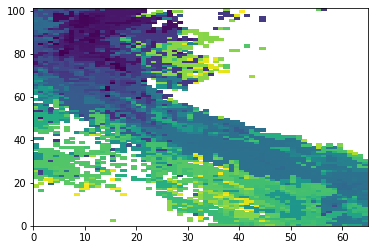

In [12]:
plt.pcolormesh(outarr_3)

In [13]:
ch_on_era = xr.open_mfdataset('/media/ck/Elements/SouthAmerica/CHIRPS/SA_daily_onERA/CHIRPS_daily_onERA_*.nc')
chirps_doypick = ch_on_era['precip'].sel(time=((ch_on_era['time.year']>=1985)&(ch_on_era['time.year']<=2018))).sel(latitude=slice(-25,0), longitude=slice(-81,-65))
chirps_bimod = chirps_doypick#.rolling(time=30, min_periods=3, center=True).mean()#.where((chirps_doypick['time.month']!=8))

In [14]:
tir_on_era = xr.open_mfdataset('/home/ck/DIR/mymachine/GRIDSAT/MCS18_peru/daily_-15ALLkm2_UTC_DAY_onBIGERA/*.nc',
                                combine='nested', concat_dim='time')
tir_doypick = tir_on_era['tir'].sel(time=((tir_on_era['time.year']>=1985)&(tir_on_era['time.year']<=2018))).sel(latitude=slice(-25,0), longitude=slice(-81,-65))

In [15]:
tir_on_era

<xarray.Dataset>
Dimensions:    (latitude: 125, longitude: 97, time: 12908)
Coordinates:
  * time       (time) datetime64[ns] 1984-01-01 1984-01-02 ... 2019-09-30
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -58.5 -58.25 -58.0
  * latitude   (latitude) float32 -25.0 -24.75 -24.5 -24.25 ... 5.5 5.75 6.0
Data variables:
    tir        (time, latitude, longitude) float64 dask.array<chunksize=(31, 125, 97), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [16]:
regions = {
    'equatorial' : [(-5,0)],
    'transition' : [(-8,-5)],
    'central' : [(-12,-8)],
    'southern' : [(-20,-12)]}
h = 2000

In [17]:
lat_pick = corr_all.latitude.values
corr_start = start
corr_end = end

In [18]:
for r in regions.keys():
    mask = (lat_pick>(regions[r])[0][0]) & (lat_pick<=(regions[r])[0][1])
    sedoy = (np.mean(corr_start[mask]), np.mean(corr_end[mask]))
    regions[r].append(sedoy)

In [19]:
regions

{'equatorial': [(-5, 0), (233.775, 181.75)],
 'transition': [(-8, -5), (244.16666666666666, 147.41666666666666)],
 'central': [(-12, -8), (259.03125, 119.90625)],
 'southern': [(-20, -12), (286.703125, 83.734375)]}

In [20]:
posgrid = np.intersect1d(era.time.values, chirps_doypick.time.values)
posgridg = np.intersect1d(chirps_doypick.time.values, tir_doypick.time.values)

u200ca = era.sel(time=posgrid)
cau200 = chirps_doypick.sel(time=posgrid)
grid200 = tir_doypick.sel(time=posgridg)/100
u200gr = chirps_doypick.sel(time=posgridg)

In [21]:
u200ca

<xarray.Dataset>
Dimensions:    (latitude: 101, longitude: 65, time: 12418)
Coordinates:
  * longitude  (longitude) float32 -81.0 -80.75 -80.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 -25.0 -24.75 -24.5 -24.25 ... -0.5 -0.25 0.0
    level      int32 ...
  * time       (time) datetime64[ns] 1985-01-01 1985-01-02 ... 2018-12-31
Data variables:
    u          (time, latitude, longitude) float32 ...

In [22]:
def weighted_regress(bins,data, pval):
    import statsmodels.api as sm
    data = np.array(data)
    pos = np.isfinite(data)
    inbins = bins#[pos]
    indata = data#[pos]
    inval = np.array(pval)#[pos]
    X = sm.add_constant(inbins)
    weight = inval / np.sum(inval)
    #ipdb.set_trace()
    wls_model = sm.WLS(indata,X, missing='drop', weights=weight).fit() # #, weights=weight
    
    r, pval = stats.pearsonr(bins, data)
    
    intercept = wls_model.params[0] #  intercept
    slope = wls_model.params[1] #  slope
    r_value = wls_model.rsquared  #rsquared
    rpearson = r
    ppearson = pval
    return intercept, slope, r_value,rpearson, ppearson

In [23]:
[0.1]+list(np.arange(10,91,10))+[99.9]

[0.1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99.9]

In [24]:
import seaborn as sns
colord = sns.color_palette("magma_r")

/home/ck/pythonWorkspace/proj_CEH/endgame/hist2d.py:432: RuntimeWarning: invalid value encountered in true_divide
  outdic['y'].append(np.sum(yvar[mask]>gt)/float(yvar[mask].size))
/home/ck/pythonWorkspace/proj_CEH/endgame/hist2d.py:432: RuntimeWarning: invalid value encountered in true_divide
  outdic['y'].append(np.sum(yvar[mask]>gt)/float(yvar[mask].size))
/home/ck/pythonWorkspace/proj_CEH/endgame/hist2d.py:432: RuntimeWarning: invalid value encountered in true_divide
  outdic['y'].append(np.sum(yvar[mask]>gt)/float(yvar[mask].size))
/home/ck/pythonWorkspace/proj_CEH/endgame/hist2d.py:432: RuntimeWarning: invalid value encountered in true_divide
  outdic['y'].append(np.sum(yvar[mask]>gt)/float(yvar[mask].size))


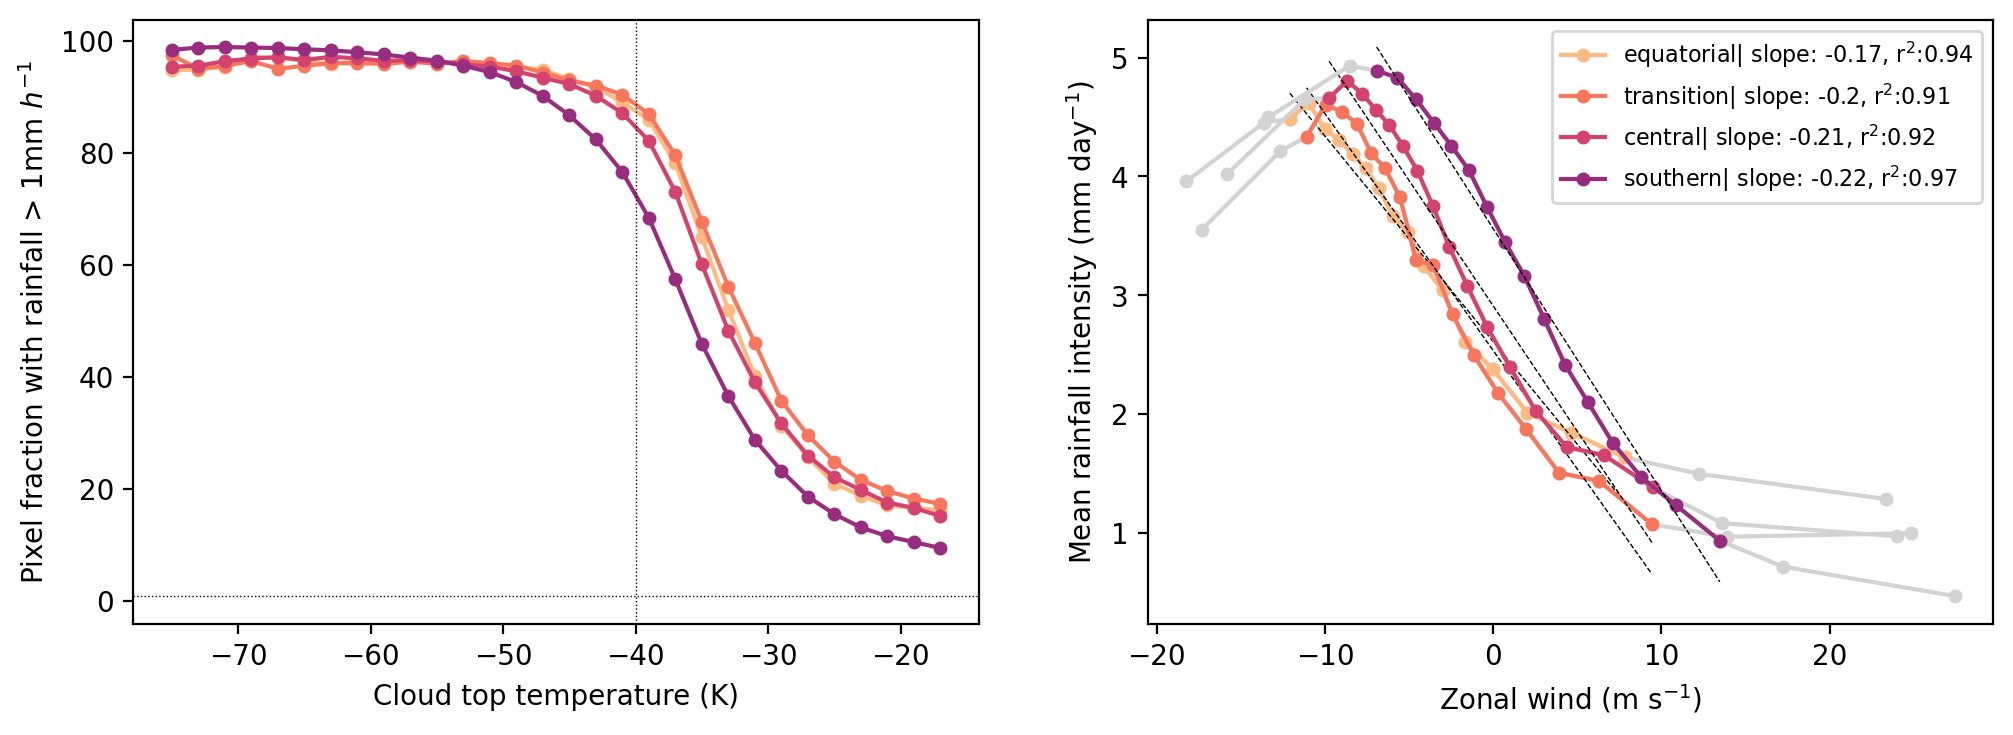

In [30]:
from endgame import hist2d

f = plt.figure(figsize=(12,4), dpi=200)
#ax = f.add_subplot(2,2,ids+1)
ax2 = f.add_subplot(121)
ax = f.add_subplot(122)
#ax3 = f.add_subplot(133)
for ids, r in enumerate(regions.keys()):
    
    alls = regions[r]
    doys_s = np.round(alls[1][0])
    doys_e = np.round(alls[1][1])
    era_region = u200ca['u'].sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200ca['time.dayofyear']>=doys_s) | (u200ca['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    chirps_region = cau200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((cau200['time.dayofyear']>=doys_s) | (cau200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    
    era_region_gr = u200gr.sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200gr['time.dayofyear']>=doys_s) | (u200gr['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    grid_region = grid200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((grid200['time.dayofyear']>=doys_s) | (grid200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))

    mask = np.isfinite(era_region) #& (chirps_region > 0.01) 
    mask_gr = np.isfinite(era_region_gr) & (grid_region < -15)
    #xbins = np.arange(-18,19,2)
    #ipdb.set_trace()
    xbins = np.percentile(era_region.values[mask], [0.1]+list(np.arange(5,96,5))+[99.9])
    
    cbins = np.arange(-80,-10,2)#np.percentile(grid_region.values[mask_gr], [0.1]+list(np.arange(5,96,5))+[99.9])
    
    dic = hist2d.var2_binning_mean(era_region.values[mask],chirps_region.values[mask],xbins)
    chperc = np.percentile(era_region_gr.values[mask_gr], 90)
    dicgrid = hist2d.var2_binning_threshold(grid_region.values[mask_gr], era_region_gr.values[mask_gr], cbins, gt=1, lt=None)
    
    ax.plot(dic['xbins'], dic['y'], marker='o', markersize=4, color='lightgrey')
    
    stx = 2
    ste = -2
    
    intercept, slope, r_value,rpearson, ppearson = weighted_regress(dic['xbins'][stx:ste],dic['y'][stx:ste],dic['ycount'][stx:ste] )
    ax.plot(dic['xbins'][stx:ste], dic['y'][stx:ste], label=r+'| slope: '+str(np.round(slope,2))+r', r$^2$:'+str(np.round(r_value**2,2)), marker='o', markersize=4, color=colord[ids])
    ax.plot(dic['xbins'][stx:ste],slope*(dic['xbins'][stx:ste])+intercept, linestyle='dashed', color='k', linewidth=0.5)
    

    ax2.plot(dicgrid['xbins'][stx:ste], np.array(dicgrid['y'][stx:ste])*100, label=r+' | slope: '+str(np.round(slope,2))+r', r$^2$:'+str(np.round(r_value**2,2)), marker='o', markersize=4, color=colord[ids])

    

    ax.set_xlabel('Zonal wind (m s$^{-1}$)')
    ax2.set_xlabel('Cloud top temperature (K)')
    ax.set_ylabel('Mean rainfall intensity (mm day$^{-1}$)')
    ax2.set_ylabel('Pixel fraction with rainfall > 1mm $h^{-1}$')
    
#     hist, count, h = u_stats.histo_frequency(chirps_region.values[mask], bins=np.arange(0,20,0.1))
#     ax3.plot(np.arange(0,19.9,0.1),hist, label=r, color=colord[ids])
#     ax3.set_yscale('log')
    
ax.legend(fontsize=8)
ax2.axvline(-40, linestyle='dotted', linewidth=0.5, color='k')
ax2.axhline(0.8, linestyle='dotted', linewidth=0.5, color='k')
#ax2.legend(fontsize=8)
#ax2.set_ylim(-50,-25)
#ax3.legend()
plt.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/paper/figS01.jpg')

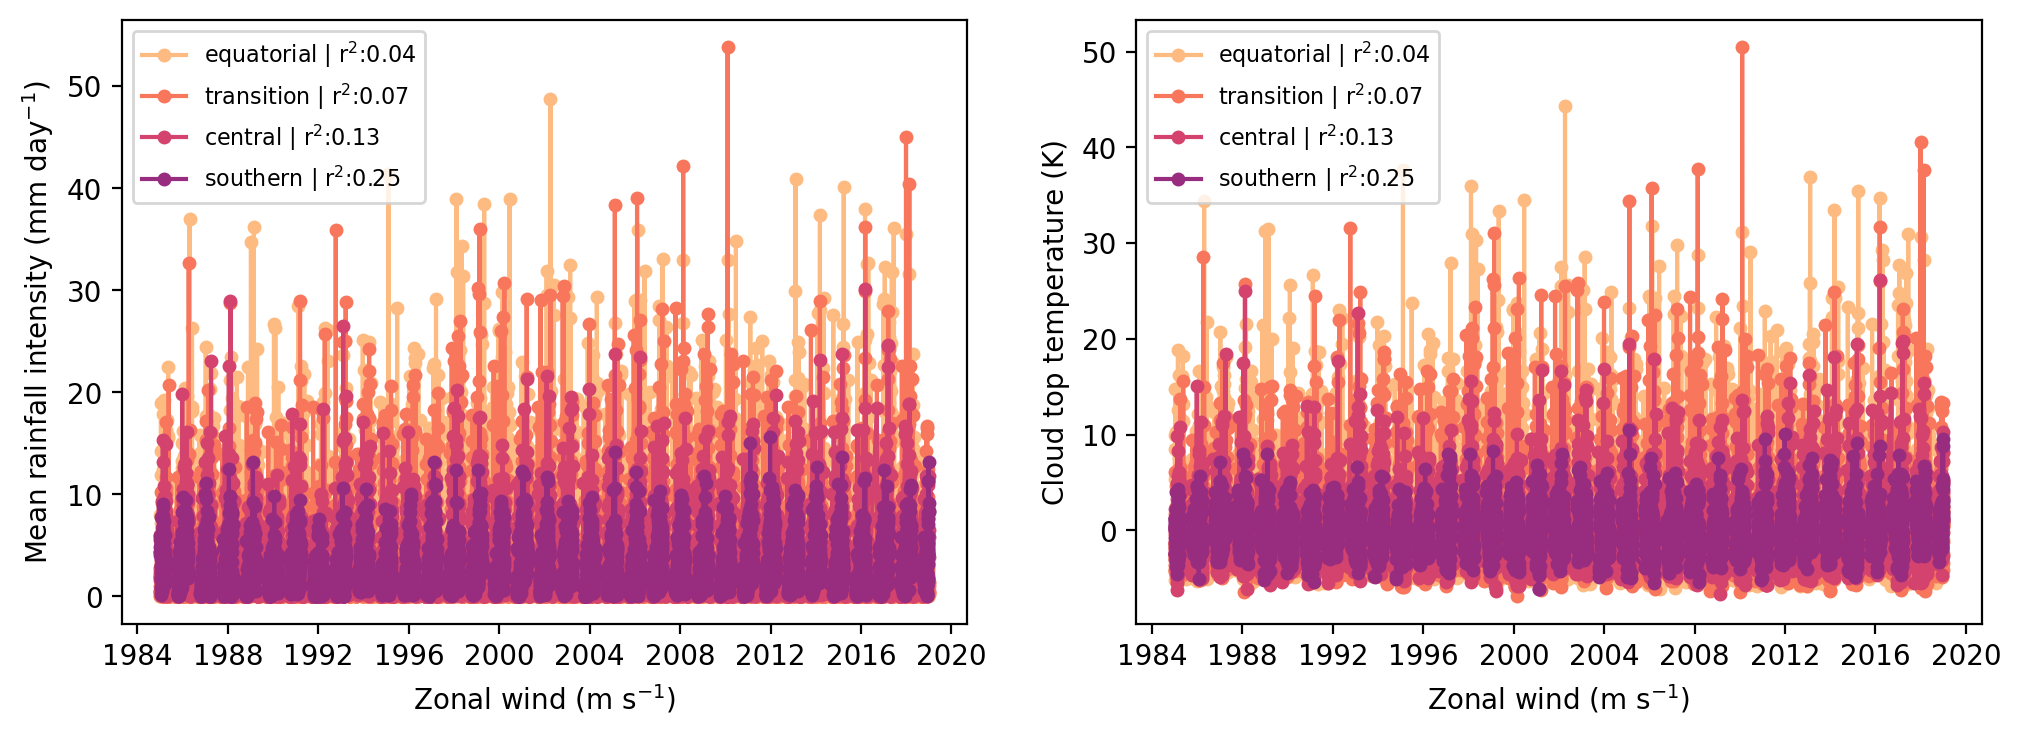

In [26]:
from endgame import hist2d

f = plt.figure(figsize=(12,4), dpi=200)
#ax = f.add_subplot(2,2,ids+1)
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
#ax3 = f.add_subplot(133)
for ids, r in enumerate(regions.keys()):
    
    alls = regions[r]
    doys_s = np.round(alls[1][0])
    doys_e = np.round(alls[1][1])
    era_region = u200ca['u'].sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200ca['time.dayofyear']>=doys_s) | (u200ca['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    chirps_region = cau200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((cau200['time.dayofyear']>=doys_s) | (cau200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    
    era_region_gr = u200gr.sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200gr['time.dayofyear']>=doys_s) | (u200gr['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    grid_region = grid200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((grid200['time.dayofyear']>=doys_s) | (grid200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))

    mask = np.isfinite(era_region) #& (chirps_region > 0.01) 
    mask_gr = np.isfinite(era_region_gr) & (grid_region < -15)
    #xbins = np.arange(-18,19,2)
    #ipdb.set_trace()
    xbins = np.percentile(era_region.values[mask], [0.1]+list(np.arange(5,96,5))+[99.9])
    
    cbins = np.arange(-80,-10,2)#np.percentile(grid_region.values[mask_gr], [0.1]+list(np.arange(5,96,5))+[99.9])
    
    dic = hist2d.var2_binning_mean(era_region.values[mask],chirps_region.values[mask],xbins)

    stx = 2
    ste = -2
    intercept, slope, r_value,rpearson, ppearson = weighted_regress(dic['xbins'][stx:ste],dic['y'][stx:ste],dic['ycount'][stx:ste] )
     
    ts_reconstruct = era_region.copy(deep=True)
    ts_reconstruct.values = slope*(ts_reconstruct.values)+intercept
    
    xxch = chirps_region.mean(['latitude', 'longitude'])#.groupby(chirps_region['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    xxera = ts_reconstruct.mean(['latitude', 'longitude'])#.groupby(ts_reconstruct['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    rawera = era_region.mean(['latitude', 'longitude'])#.groupby(ts_reconstruct['time.year']).mean().rolling(year=5, min_periods=5, center=True).mean()
    
    isfin = np.isfinite(xxch)&np.isfinite(xxera)
    
    ax.plot(np.unique(chirps_region['time']), xxch, label=r+" | r$^{2}$:"+str(np.round(stats.pearsonr(xxch[isfin], xxera[isfin])[0]**2,2)), marker='o', markersize=4, color=colord[ids])
    
    #ts_reconstruct = slope*(xxera)+intercept
    isfin = np.isfinite(xxch)&np.isfinite(rawera)
    ax2.plot(np.unique(chirps_region['time']), xxch-xxera, label=r+" | r$^{2}$:"+str(np.round(stats.pearsonr(xxch[isfin], rawera[isfin])[0]**2,2)), marker='o', markersize=4, color=colord[ids])
    

    ax.set_xlabel('Zonal wind (m s$^{-1}$)')
    ax2.set_xlabel('Zonal wind (m s$^{-1}$)')
    ax.set_ylabel('Mean rainfall intensity (mm day$^{-1}$)')
    ax2.set_ylabel('Cloud top temperature (K)')
    
#     hist, count, h = u_stats.histo_frequency(chirps_region.values[mask], bins=np.arange(0,20,0.1))
#     ax3.plot(np.arange(0,19.9,0.1),hist, label=r, color=colord[ids])
#     ax3.set_yscale('log')
    
ax.legend(fontsize=8)
ax2.legend(fontsize=8)
#ax2.set_ylim(-50,-25)
#ax3.legend()

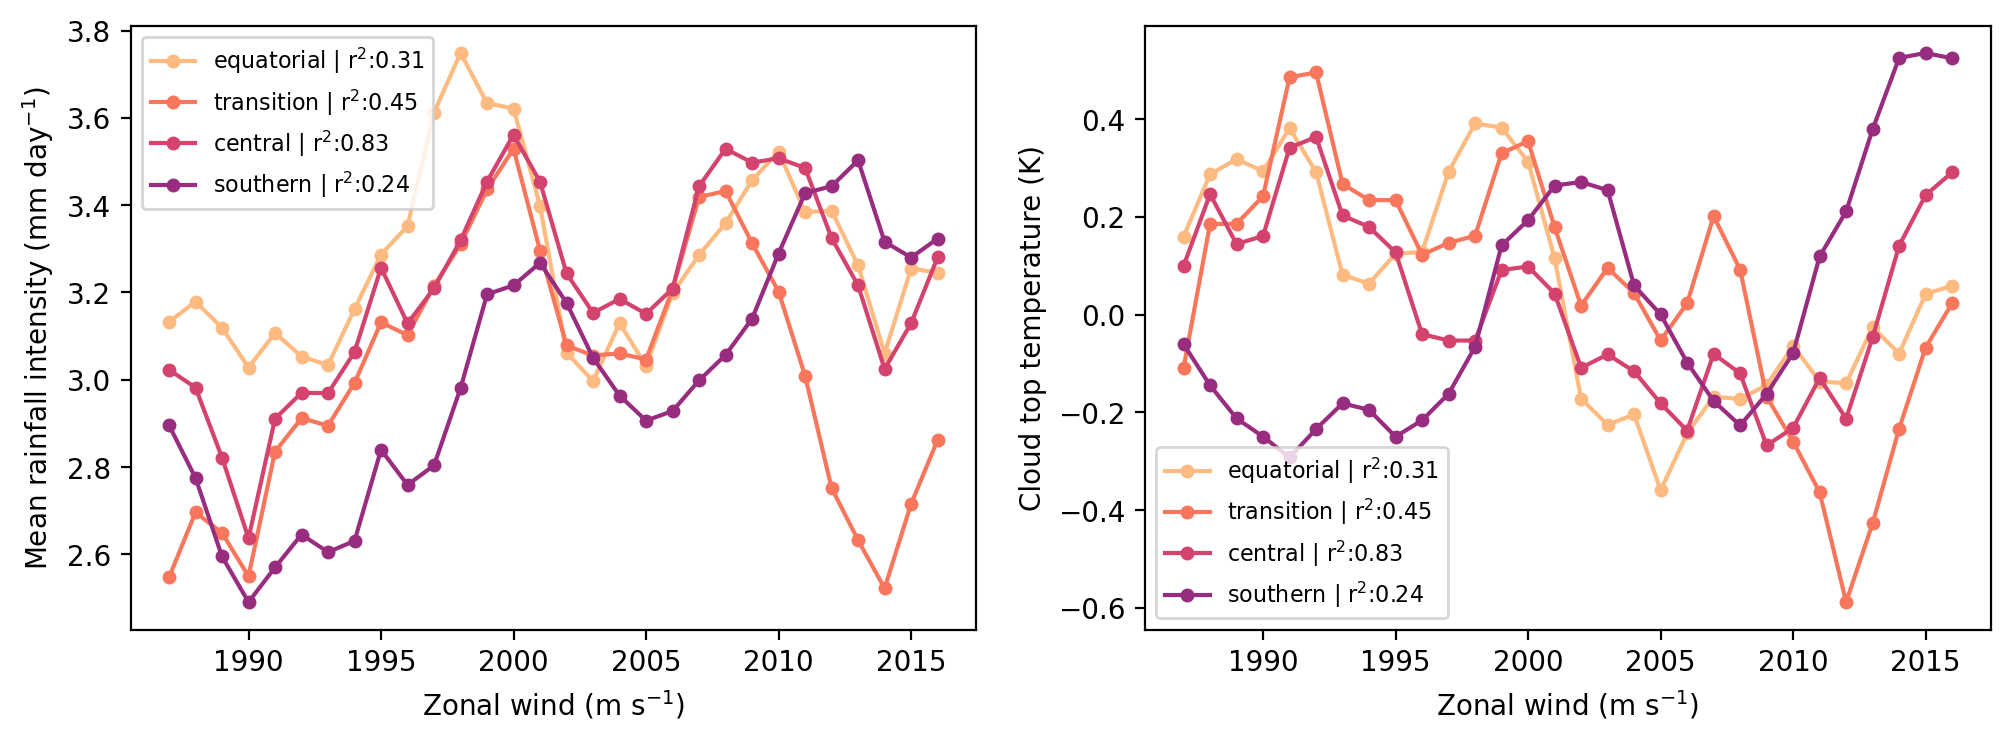

In [28]:
from endgame import hist2d

f = plt.figure(figsize=(12,4), dpi=200)
#ax = f.add_subplot(2,2,ids+1)
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
#ax3 = f.add_subplot(133)
for ids, r in enumerate(regions.keys()):
    
    alls = regions[r]
    doys_s = np.round(alls[1][0])
    doys_e = np.round(alls[1][1])
    era_region = u200ca['u'].sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200ca['time.dayofyear']>=doys_s) | (u200ca['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    chirps_region = cau200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((cau200['time.dayofyear']>=doys_s) | (cau200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    
    era_region_gr = u200gr.sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200gr['time.dayofyear']>=doys_s) | (u200gr['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    grid_region = grid200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((grid200['time.dayofyear']>=doys_s) | (grid200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))

    mask = np.isfinite(era_region) #& (chirps_region > 0.01) 
    mask_gr = np.isfinite(era_region_gr) & (grid_region < -15)
    #xbins = np.arange(-18,19,2)
    #ipdb.set_trace()
    xbins = np.percentile(era_region.values[mask], [0.1]+list(np.arange(5,96,5))+[99.9])
    
    cbins = np.arange(-80,-10,2)#np.percentile(grid_region.values[mask_gr], [0.1]+list(np.arange(5,96,5))+[99.9])
    
    dic = hist2d.var2_binning_mean(era_region.values[mask],chirps_region.values[mask],xbins)

    stx = 2
    ste = -2
    intercept, slope, r_value,rpearson, ppearson = weighted_regress(dic['xbins'][stx:ste],dic['y'][stx:ste],dic['ycount'][stx:ste] )
     
    ts_reconstruct = era_region.copy(deep=True)
    ts_reconstruct.values = slope*(ts_reconstruct.values)+intercept
    
    xxch = chirps_region.mean(['latitude', 'longitude']).groupby(chirps_region['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    xxera = ts_reconstruct.mean(['latitude', 'longitude']).groupby(ts_reconstruct['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    rawera = era_region.mean(['latitude', 'longitude']).groupby(ts_reconstruct['time.year']).mean().rolling(year=5, min_periods=5, center=True).mean()
    
    isfin = np.isfinite(xxch)&np.isfinite(xxera)
    
    ax.plot(np.unique(chirps_region['time.year']), xxch, label=r+" | r$^{2}$:"+str(np.round(stats.pearsonr(xxch[isfin], xxera[isfin])[0]**2,2)), marker='o', markersize=4, color=colord[ids])
    
    #ts_reconstruct = slope*(xxera)+intercept
    isfin = np.isfinite(xxch)&np.isfinite(rawera)
    ax2.plot(np.unique(chirps_region['time.year']), xxch-xxera, label=r+" | r$^{2}$:"+str(np.round(stats.pearsonr(xxch[isfin], rawera[isfin])[0]**2,2)), marker='o', markersize=4, color=colord[ids])
    

    ax.set_xlabel('Zonal wind (m s$^{-1}$)')
    ax2.set_xlabel('Zonal wind (m s$^{-1}$)')
    ax.set_ylabel('Mean rainfall intensity (mm day$^{-1}$)')
    ax2.set_ylabel('Cloud top temperature (K)')
    
#     hist, count, h = u_stats.histo_frequency(chirps_region.values[mask], bins=np.arange(0,20,0.1))
#     ax3.plot(np.arange(0,19.9,0.1),hist, label=r, color=colord[ids])
#     ax3.set_yscale('log')
    
ax.legend(fontsize=8)
ax2.legend(fontsize=8)
#ax2.set_ylim(-50,-25)
#ax3.legend()

In [44]:
def perc_1d_binning(data, xvar, xbins):
    import warnings
    """
    :param xvar: xvar of the 2dhist
    :param yvar: yvar of the 2d hist
    :param xbins: bins to use for the xvar
    :param ybins: bins to use for the yvar
    :param varlist: dictionary of variables to put into histogram
    :param varpick: list of variables in dic to calculate
    :return:
    """
    outdic = {}
    outdic['data'] = []


    for issh, shl in enumerate(xbins[0:-1]):

        poss_ds = (xvar > shl) & (xvar <= xbins[issh + 1])
        valdat = (data[poss_ds])[np.isfinite(data[poss_ds])]
        #dat = np.percentile(valdat, perc)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            dat = np.nanmean(valdat)

        outdic['data'].append(dat)

        #ipdb.set_trace()

    outdic['xbins'] = (np.round(xbins[0:-1]+((xbins[1::]-xbins[0:-1])/2),2))


    return outdic

In [68]:
def binning_loop(x, y):
    dic = {'corr': [], 'pval' : [], 'slope' : []}

    for ids,year in enumerate(range(1986,2019)):

        xx = x.sel(time=slice(str(year-1)+'-08-01',str(year)+'-07-30'))
        yy = y.sel(time=slice(str(year-1)+'-08-01',str(year)+'-07-30'))
        
        #ipdb.set_trace()
        
        print('Doing', year)

#         cadic = perc_1d_binning(xx,yy, xbins=np.arange(-15,15,1))
#         isval = np.isfinite(cadic['data'])
        mask = np.isfinite(xx) & np.isfinite(yy)
        b, a, r_value, p_value, std_err = linregress(xx[mask], yy[mask])
        
       # ipdb.set_trace()

        dic['corr'].append(r_value**2)
        dic['pval'].append(p_value)
        dic['slope'].append(b)
                        
    return dic

Doing 1986
Doing 1987
Doing 1988
Doing 1989
Doing 1990
Doing 1991
Doing 1992
Doing 1993
Doing 1994
Doing 1995
Doing 1996
Doing 1997
Doing 1998
Doing 1999
Doing 2000
Doing 2001
Doing 2002
Doing 2003
Doing 2004
Doing 2005
Doing 2006
Doing 2007
Doing 2008
Doing 2009
Doing 2010
Doing 2011
Doing 2012
Doing 2013
Doing 2014
Doing 2015
Doing 2016
Doing 2017
Doing 2018
Doing 1986
Doing 1987
Doing 1988
Doing 1989
Doing 1990
Doing 1991
Doing 1992
Doing 1993
Doing 1994
Doing 1995
Doing 1996
Doing 1997
Doing 1998
Doing 1999
Doing 2000
Doing 2001
Doing 2002
Doing 2003
Doing 2004
Doing 2005
Doing 2006
Doing 2007
Doing 2008
Doing 2009
Doing 2010
Doing 2011
Doing 2012
Doing 2013
Doing 2014
Doing 2015
Doing 2016
Doing 2017
Doing 2018
Doing 1986
Doing 1987
Doing 1988
Doing 1989
Doing 1990
Doing 1991
Doing 1992
Doing 1993
Doing 1994
Doing 1995
Doing 1996
Doing 1997
Doing 1998
Doing 1999
Doing 2000
Doing 2001
Doing 2002
Doing 2003
Doing 2004
Doing 2005
Doing 2006
Doing 2007
Doing 2008
Doing 2009
Doing 2010

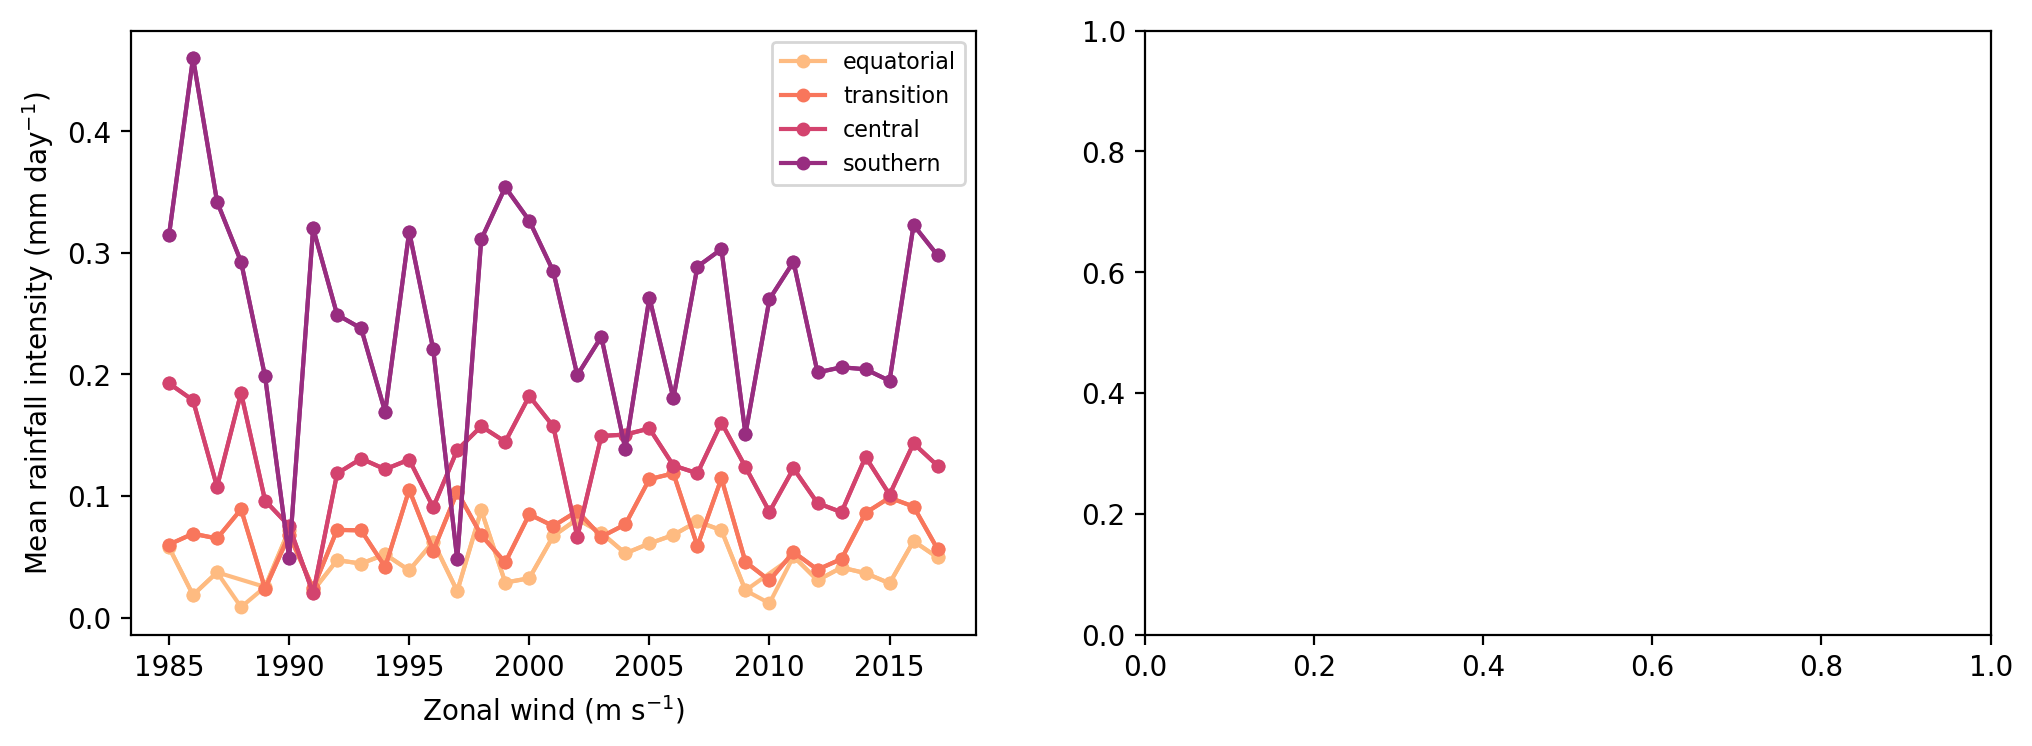

In [71]:
f = plt.figure(figsize=(12,4), dpi=200)
#ax = f.add_subplot(2,2,ids+1)
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
#ax3 = f.add_subplot(133)
for ids, r in enumerate(regions.keys()):
    
    alls = regions[r]
    doys_s = np.round(alls[1][0])
    doys_e = np.round(alls[1][1])
    era_region = u200ca['u'].sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200ca['time.dayofyear']>=doys_s) | (u200ca['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    chirps_region = cau200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((cau200['time.dayofyear']>=doys_s) | (cau200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    
    era_region_gr = u200gr.sel(latitude=slice(alls[0][0], alls[0][1]), time =((u200gr['time.dayofyear']>=doys_s) | (u200gr['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    grid_region = grid200.sel(latitude=slice(alls[0][0], alls[0][1]), time =((grid200['time.dayofyear']>=doys_s) | (grid200['time.dayofyear']<=doys_e))).where((topo_on_g>2000))
    
    xxch = chirps_region.mean(['latitude', 'longitude'])#.groupby(chirps_region['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    xxera = era_region.mean(['latitude', 'longitude'])#.groupby(era_region['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    xxgrid = grid_region.mean(['latitude', 'longitude'])#.groupby(grid_region['time.year']).mean().load().rolling(year=5, min_periods=5, center=True).mean()
    
    dic = binning_loop(xxch, xxera)
    
    years = np.unique(chirps_region['time.year'])
    valposw = np.array(dic['pval'])<0.05
    xvalw  = (years[0:-1])[valposw]
    yvalw = np.array(dic['corr'])[valposw]
    
    ax.plot(years[0:-1], dic['corr'], label=r, marker='o', markersize=4, color=colord[ids])
    ax.plot(xvalw, yvalw, marker='o', markersize=4, color=colord[ids])


    ax.set_xlabel('Zonal wind (m s$^{-1}$)')
    ax.set_ylabel('Mean rainfall intensity (mm day$^{-1}$)')


#     hist, count, h = u_stats.histo_frequency(chirps_region.values[mask], bins=np.arange(0,20,0.1))
#     ax3.plot(np.arange(0,19.9,0.1),hist, label=r, color=colord[ids])
#     ax3.set_yscale('log')
    
ax.legend(fontsize=8)
#ax2.legend(fontsize=8)
#ax2.set_ylim(-50,-25)
#ax3.legend()

Text(0, 0.5, 'Mean rainfall intensity (mm day$^{-1}$)')

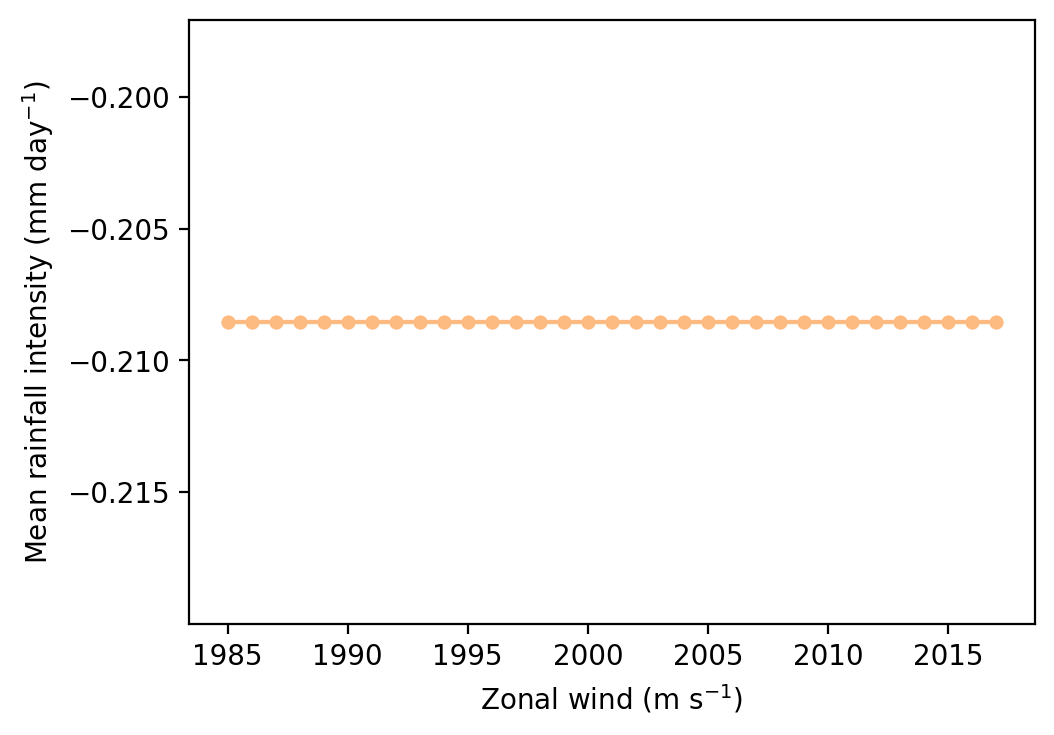

In [60]:
f = plt.figure(figsize=(12,4), dpi=200)
ax = f.add_subplot(121)
valposw = np.array(dic['pval'])<0.05
xvalw  = (years[0:-1])[valposw]
yvalw = np.array(dic['corr'])[valposw]   

ax.plot(years[0:-1], dic['corr'], label=r, marker='o', markersize=4, color=colord[ids])
ax.plot(xvalw, yvalw, marker='o', markersize=4, color=colord[ids])


ax.set_xlabel('Zonal wind (m s$^{-1}$)')
ax.set_ylabel('Mean rainfall intensity (mm day$^{-1}$)')


#     hist, count, h = u_stats.histo_frequency(chirps_region.values[mask], bins=np.arange(0,20,0.1))
#     ax3.plot(np.arange(0,19.9,0.1),hist, label=r, color=colord[ids])
#     ax3.set_yscale('log')
    
#ax.legend(fontsize=8)
#ax2.legend(fontsize=8)
#ax2.set_ylim(-50,-25)
#ax3.legend()

In [57]:
valposw

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [58]:
len(valposw)

33